In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [2]:
def cov_matrix(universe, weights, start, end):
    prices = get_pricing(universe, fields='price', start_date=start, end_date=end)
    normal_prices =  (prices-prices.min())/(prices.max()-prices.min())
    matrix = normal_prices.corr()
    total = np.dot(np.dot(weights, matrix.values), weights.T)
    return matrix, total

In [3]:
def plot_heatmap(cov):
    sns.heatmap(cov, 
        xticklabels=cov.columns,
        yticklabels=cov.columns)

## Date Range

In [4]:
start = '2019-09-01'
end = '2020-09-01'

## Before adding TSLA

In [5]:
universe = ['FB', 'GOOG', 'AMZN', 'AAPL']
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [6]:
matrix, total = cov_matrix(universe,weights, start, end)
print("covariance matrix")
matrix

covariance matrix


,Equity(42950 [FB]),Equity(46631 [GOOG]),Equity(16841 [AMZN]),Equity(24 [AAPL])
Equity(42950 [FB]),1.000000,0.923439,0.823530,0.914719
Equity(46631 [GOOG]),0.923439,1.000000,0.727740,0.864815
Equity(16841 [AMZN]),0.823530,0.727740,1.000000,0.910622
Equity(24 [AAPL]),0.914719,0.864815,0.910622,1.000000


In [7]:
print("total covariance:", total)

total covariance: 0.895608093887


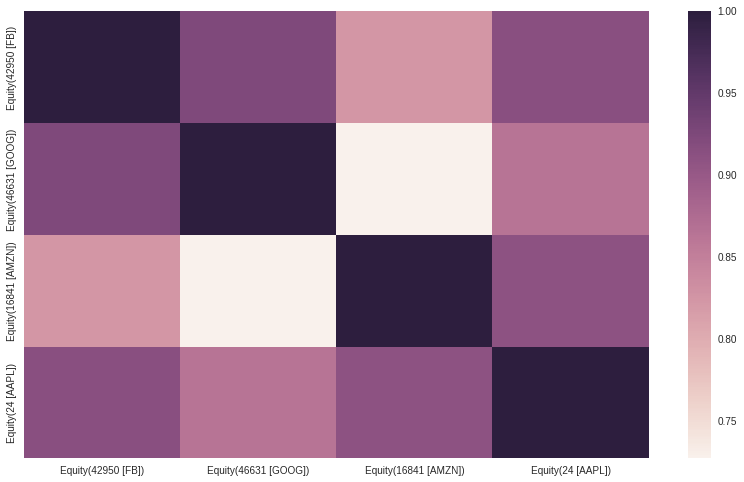

In [8]:
plot_heatmap(matrix)

## After adding TSLA

In [9]:
universe_T = ['FB', 'GOOG', 'AMZN', 'AAPL', 'TSLA']
weights_T = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [10]:
matrix_T, total_T = cov_matrix(universe_T, weights_T, start, end)

In [11]:
print("covariance matrix")
matrix_T

covariance matrix


,Equity(42950 [FB]),Equity(46631 [GOOG]),Equity(16841 [AMZN]),Equity(24 [AAPL]),Equity(39840 [TSLA])
Equity(42950 [FB]),1.000000,0.923439,0.823530,0.914719,0.832682
Equity(46631 [GOOG]),0.923439,1.000000,0.727740,0.864815,0.784058
Equity(16841 [AMZN]),0.823530,0.727740,1.000000,0.910622,0.957261
Equity(24 [AAPL]),0.914719,0.864815,0.910622,1.000000,0.954423
Equity(39840 [TSLA]),0.832682,0.784058,0.957261,0.954423,1.000000


In [12]:
print("total covariance:", total_T)

total covariance: 0.895463150009


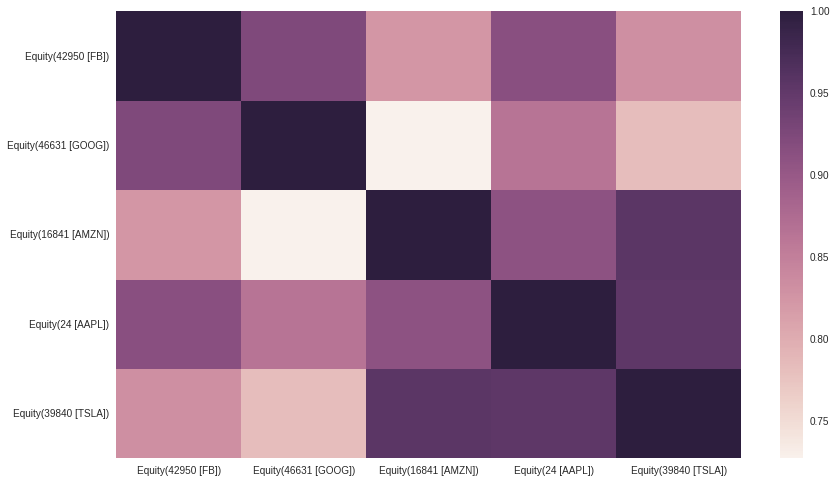

In [13]:
plot_heatmap(matrix_T)

## Add BRK.B instead

In [14]:
universe_B = ['FB', 'GOOG', 'AMZN', 'AAPL', 'BRK.B']
weights_B = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [15]:
matrix_B, total_B = cov_matrix(universe_B, weights_B, start, end)

In [16]:
print("covariance matrix")
matrix_B

covariance matrix


,Equity(42950 [FB]),Equity(46631 [GOOG]),Equity(16841 [AMZN]),Equity(24 [AAPL]),Equity(11100 [BRK_B])
Equity(42950 [FB]),1.000000,0.923439,0.823530,0.914719,0.075300
Equity(46631 [GOOG]),0.923439,1.000000,0.727740,0.864815,0.203879
Equity(16841 [AMZN]),0.823530,0.727740,1.000000,0.910622,-0.372784
Equity(24 [AAPL]),0.914719,0.864815,0.910622,1.000000,-0.058643
Equity(11100 [BRK_B]),0.075300,0.203879,-0.372784,-0.058643,1.000000


In [17]:
print("total covariance:", total_B)

total covariance: 0.601009311705


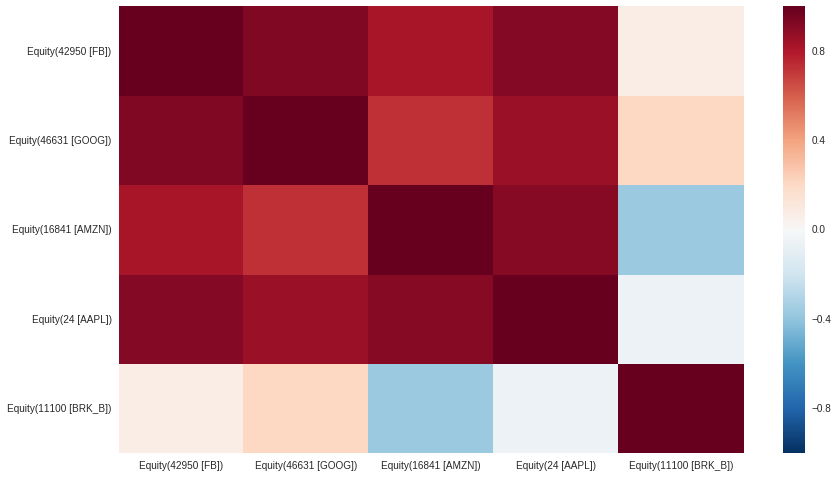

In [18]:
plot_heatmap(matrix_B)